# Support vector machine

### 1. Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [4]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

### 2. Model fitting

In [5]:
C = 1
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

SVC(C=1, kernel='linear')

### 3. Confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

### 4. Kernel SVM 적합 및 비교

- LinearSVC

In [8]:
clf = svm.LinearSVC(C=C, max_iter=10000)
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]], dtype=int64)

- radial basis function

In [9]:
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000)
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

- polynomial kernel

In [10]:
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]], dtype=int64)

### 5. 시각적 비교

- 함수 정의

In [24]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

- Data Loading

In [25]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- model fitting

In [26]:
C = 1.0 # Regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [27]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

C:\Users\Hongjin\AppData\Local\Temp/ipykernel_12044/2944640139.py:12: UserWarning: The following kwargs were not used by contour: 'alpah'
  out = ax.contourf(xx, yy, Z, **params)
C:\Users\Hongjin\AppData\Local\Temp/ipykernel_12044/2944640139.py:12: UserWarning: The following kwargs were not used by contour: 'alpah'
  out = ax.contourf(xx, yy, Z, **params)
C:\Users\Hongjin\AppData\Local\Temp/ipykernel_12044/2944640139.py:12: UserWarning: The following kwargs were not used by contour: 'alpah'
  out = ax.contourf(xx, yy, Z, **params)
C:\Users\Hongjin\AppData\Local\Temp/ipykernel_12044/2944640139.py:12: UserWarning: The following kwargs were not used by contour: 'alpah'
  out = ax.contourf(xx, yy, Z, **params)


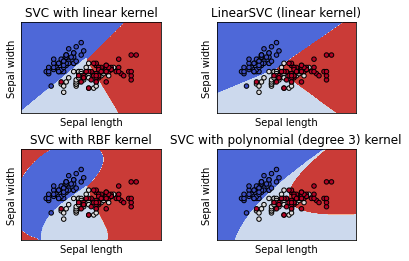

In [28]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0, x1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpah=0.8)
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()

- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.